In [3]:
import pandas as pd

In [4]:
data=pd.read_csv("creditcard.csv")
data.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
print(data['Class'].value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


In [7]:
print(data.isnull().sum().sum())

0


In [8]:
data=data.drop_duplicates()

In [9]:
from sklearn.preprocessing import StandardScaler

scaler_amount = StandardScaler()
scaler_time = StandardScaler()

data["Amount"] = scaler_amount.fit_transform(data[["Amount"]])
data["Time"] = scaler_time.fit_transform(data[["Time"]])

In [10]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Nikhil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [11]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X = data.drop("Class", axis=1)
y = data["Class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print(y_train_smote.value_counts())

Class
0    226602
1    226602
Name: count, dtype: int64


In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

lr = LogisticRegression()
lr.fit(X_train_smote, y_train_smote)

y_pred = lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Logistic Regression Model:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1:.4f}")

Logistic Regression Model:
Accuracy: 0.9737
Precision: 0.0531
Recall: 0.8737
F1-score: 0.1002


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_smote, y_train_smote)

y_pred_rf = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print(f"Random Forest Model:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1:.4f}")


Random Forest Model:
Accuracy: 0.9995
Precision: 0.9114
Recall: 0.7579
F1-score: 0.8276


In [12]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

xgb = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb.fit(X_train_smote, y_train_smote)

y_pred_xgb = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_xgb)
precision = precision_score(y_test, y_pred_xgb)
recall = recall_score(y_test, y_pred_xgb)
f1 = f1_score(y_test, y_pred_xgb)

print(f"XGBoost Model:\nAccuracy: {accuracy:.4f}\nPrecision: {precision:.4f}\nRecall: {recall:.4f}\nF1-score: {f1:.4f}")

XGBoost Model:
Accuracy: 0.9992
Precision: 0.7500
Recall: 0.7895
F1-score: 0.7692


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    return [model_name, accuracy, precision, recall, f1]

results = []
results.append(evaluate_model(lr, X_test, y_test, "Logistic Regression"))
results.append(evaluate_model(rf, X_test, y_test, "Random Forest"))
results.append(evaluate_model(xgb, X_test, y_test, "XGBoost"))

results_df = pd.DataFrame(results, columns=["Model", "Accuracy", "Precision", "Recall", "F1-Score"])

In [13]:
results_df.style.set_caption("Model Performance Comparison")

,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.973725,0.053137,0.873684,0.100181
1,Random Forest,0.999471,0.911392,0.757895,0.827586
2,XGBoost,0.999207,0.750000,0.789474,0.769231


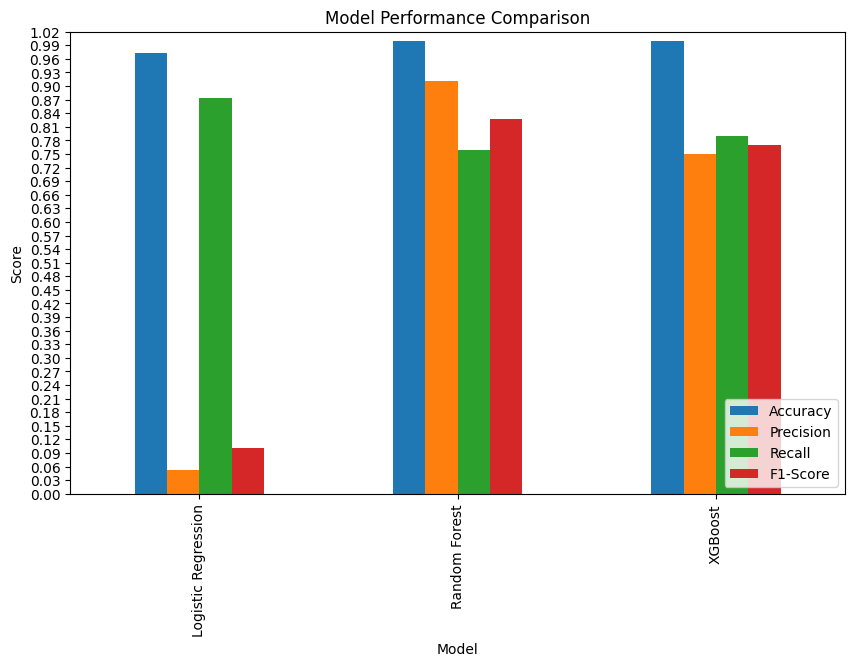

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Plot bar chart
results_df.set_index("Model").plot(kind="bar", figsize=(10, 6))
plt.title("Model Performance Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)  

plt.yticks(np.arange(0, 1.05, 0.03))

plt.legend(loc="lower right")
plt.show()


In [1]:
pip install Flask joblib

Defaulting to user installation because normal site-packages is not writeable
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
Using cached blinker-1.9.0-py3-none-any.whl (8.5 kB)
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.0.2
    Uninstalling Werkzeug-3.0.2:
      Successfully uninstalled Werkzeug-3.0.2
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: C:\Users\Nikhil\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [13]:
import joblib

joblib.dump(xgb, "xgboost_model.pkl")

print("Model saved successfully!")


Model saved successfully!


In [15]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib

# Initialize Flask app
app = Flask(__name__)

# Load the trained model
try:
    model = joblib.load("xgboost_model.pkl")
except Exception as e:
    print(f"Error loading model: {e}")
    model = None

@app.route("/")
def home():
    return "Credit Card Fraud Detection API is Running!"

@app.route("/predict", methods=["POST"])
def predict():
    if model is None:
        return jsonify({"error": "Model not loaded."})

    try:
        # Get JSON data from request
        data = request.get_json()

        # Check if data is received
        if not data:
            return jsonify({"error": "No data provided."})

        # Convert data to DataFrame
        df = pd.DataFrame(data)

        # Make predictions
        predictions = model.predict(df)

        # Return predictions as JSON
        return jsonify({"predictions": predictions.tolist()})

    except Exception as e:
        return jsonify({"error": str(e)})

if __name__ == "__main__":
    app.run(debug=True, use_reloader=False)


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Feb/2025 12:13:13] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Feb/2025 12:13:13] "GET /favicon.ico HTTP/1.1" 404 -
